<a href="https://colab.research.google.com/github/joy1303125/Natural_language_Processing-And-Time_series_forecasting/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers.convolutional import Conv1D   
from keras.layers.recurrent import LSTM

In [ ]:
movie_reviews = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

print(movie_reviews.isnull().values.any())

movie_reviews.shape

False


(50000, 2)

In [ ]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie_reviews["review"][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

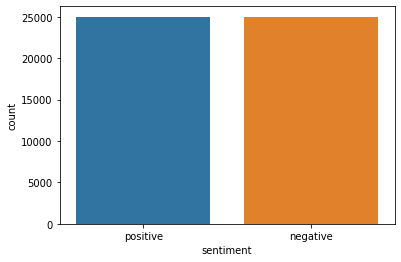

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Glove file is a collection of all of the common words. And this words are represented in a vector representation.Finally it will use as the defined weights which is so much helpful because we don't have to train our model from scratch.It is just like word2 vec . The only differnece is instead of confined itself locally iot is considering all of the words globally.

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Text Classification with Simple Neural Network

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          9254700   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10001     
Total params: 9,264,701
Trainable params: 10,001
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.4169 - acc: 0.8085 - val_loss: 0.6002 - val_acc: 0.7245
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3962 - acc: 0.8203 - val_loss: 0.5859 - val_acc: 0.7326
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3792 - acc: 0.8287 - val_loss: 0.5900 - val_acc: 0.7330
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3736 - acc: 0.8313 - val_loss: 0.6024 - val_acc: 0.7291
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.3709 - acc: 0.8331 - val_loss: 0.6112 - val_acc: 0.7293
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3633 - acc: 0.8381 - val_loss: 0.6385 - val_acc: 0.7251
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.3619 - acc: 0.8409 - val_loss: 0.6309 - val_acc: 0.7266
Epoch 8/10
500/500 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.6658 - acc: 0.7249


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6658493876457214
Test Accuracy: 0.7249000072479248


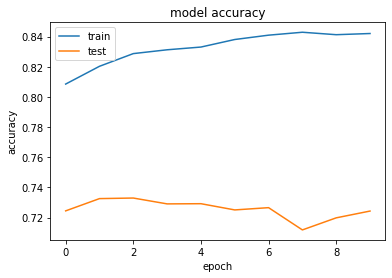

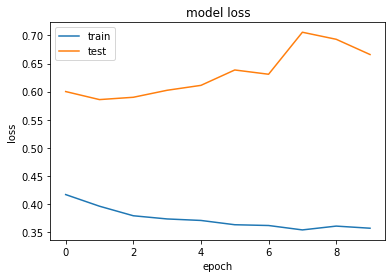

In [ ]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Text Classification with a Convolutional Neural Network

In [ ]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 9,318,957
Trainable params: 64,257
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4614 - acc: 0.7789 - val_loss: 0.4010 - val_acc: 0.8135
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3486 - acc: 0.8462 - val_loss: 0.3988 - val_acc: 0.8190
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2967 - acc: 0.8757 - val_loss: 0.3579 - val_acc: 0.8394
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2469 - acc: 0.9023 - val_loss: 0.3780 - val_acc: 0.8295
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2070 - acc: 0.9225 - val_loss: 0.3541 - val_acc: 0.8436
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1698 - acc: 0.9416 - val_loss: 0.3578 - val_acc: 0.8446
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1412 - acc: 0.9556 - val_loss: 0.3734 - val_acc: 0.8435
Epoch 8/10
500/500 [==============================] - 2s 4ms/step - loss: 0.

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.416763037443161
Test Accuracy: 0.8391000032424927


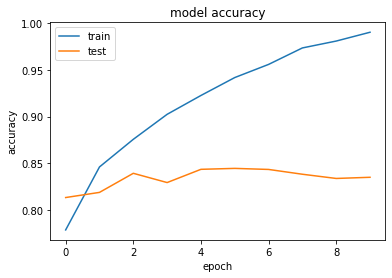

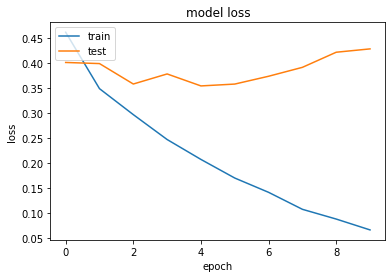

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

Text Classification with Recurrent Neural Network (LSTM). For better understanding of LSTM use this link-https://www.youtube.com/watch?v=8HyCNIVRbSU

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          9254700   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,372,077
Trainable params: 117,377
Non-trainable params: 9,254,700
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
500/500 [==============================] - 92s 124ms/step - loss: 0.6060 - acc: 0.6591 - val_loss: 0.4386 - val_acc: 0.7930
Epoch 2/10
500/500 [==============================] - 59s 119ms/step - loss: 0.4140 - acc: 0.8132 - val_loss: 0.3729 - val_acc: 0.8366
Epoch 3/10
500/500 [==============================] - 58s 117ms/step - loss: 0.3645 - acc: 0.8404 - val_loss: 0.3674 - val_acc: 0.8399
Epoch 4/10
500/500 [==============================] - 59s 117ms/step - loss: 0.3403 - acc: 0.8543 - val_loss: 0.3557 - val_acc: 0.8484
Epoch 5/10
500/500 [==============================] - 59s 117ms/step - loss: 0.3255 - acc: 0.8590 - val_loss: 0.3540 - val_acc: 0.8490
Epoch 6/10
500/500 [==============================] - 59s 117ms/step - loss: 0.2949 - acc: 0.8708 - val_loss: 0.3544 - val_acc: 0.8474
Epoch 7/10
500/500 [==============================] - 58s 117ms/step - loss: 0.2822 - acc: 0.8830 - val_loss: 0.3403 - val_acc: 0.8544
Epoch 8/10
500/500 [==============================] - 5

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3892698585987091
Test Accuracy: 0.8543000221252441


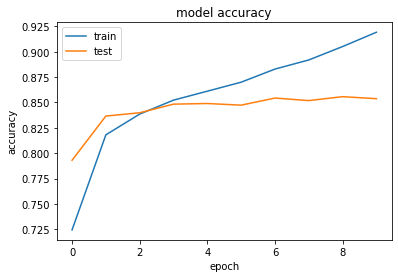

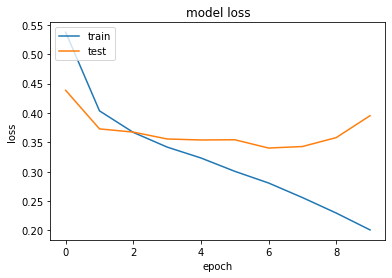

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Checking one review whether our model working or not

In [ ]:
instance = X[60]
print(instance)


What happened What we have here is basically solid and plausible premise and with decent and talented cast but somewhere the movie loses it Actually it never really got going There was little excitement when we find out that Angie is not really pregnant then find out that she is after all but that was it Steve Martin who is very talented person and usually brings lot to movie was dreadful and his entire character was not even close to being important to this movie other than to make it longer really would have liked to see more interactions between the main characters Kate and Angie and maybe try not for pure comedy which unfortunately it was not but maybe drama with comedic elements think if the movie did this it could have been very funny since both actresses are quite funny in their own ways and sitting here can think of numerous scenarios that would have been riot 


In [ ]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

array([[0.78635746]], dtype=float32)

As the array value is more than 0.5 it is positive review

By analysis Glove2Vec,Convloution1D and Lstm model I can say LSTM model works really well